In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
principal = 100000
dur_years = 2
ann_int = 0.24

In [3]:
mon_int = ann_int/12
dur_mon = dur_years*12

In [4]:
monthly_payment = round(principal * (mon_int/(1-(1+mon_int)**(-dur_mon))),2)

In [5]:
months=range(1,dur_mon+1)

In [6]:
annuity = pd.DataFrame(index=months,columns=['Start Balance', 'Total Payment', 'Interest Payment','Principal Payment','End Balance'])
annuity.index.name = 'Month'

In [7]:
annuity.loc[1,'Start Balance'] = principal
annuity['Total Payment'] = monthly_payment
annuity.loc[1,'Interest Payment'] = round(annuity.loc[1,'Start Balance']*mon_int,2)
annuity.loc[1,'Principal Payment'] = annuity.loc[1,'Total Payment'] - annuity.loc[1,'Interest Payment']
annuity.loc[1,'End Balance'] = annuity.loc[1,'Start Balance'] - annuity.loc[1,'Principal Payment']

In [8]:
for i in range(2,dur_mon+1):
    annuity.loc[i,'Start Balance'] = annuity['End Balance'][i-1]
    annuity.loc[i,'Interest Payment'] = round(annuity['Start Balance'][i]*mon_int,2)
    annuity.loc[i,'Principal Payment'] = annuity['Total Payment'][i] - annuity['Interest Payment'][i]
    annuity.loc[i,'End Balance'] = annuity['Start Balance'][i] - annuity['Principal Payment'][i]

In [9]:
annuity.head()

,Start Balance,Total Payment,Interest Payment,Principal Payment,End Balance
Month,,,,,
1,100000,5287.11,2000,3287.11,96712.9
2,96712.9,5287.11,1934.26,3352.85,93360
3,93360,5287.11,1867.2,3419.91,89940.1
4,89940.1,5287.11,1798.8,3488.31,86451.8
5,86451.8,5287.11,1729.04,3558.07,82893.8


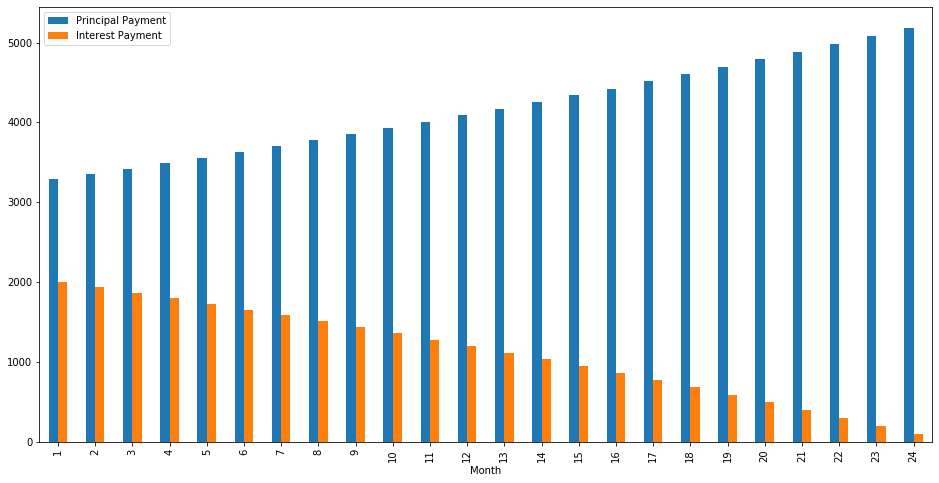

In [10]:
annuity[['Principal Payment','Interest Payment']].plot(kind='bar',figsize=(16,8))

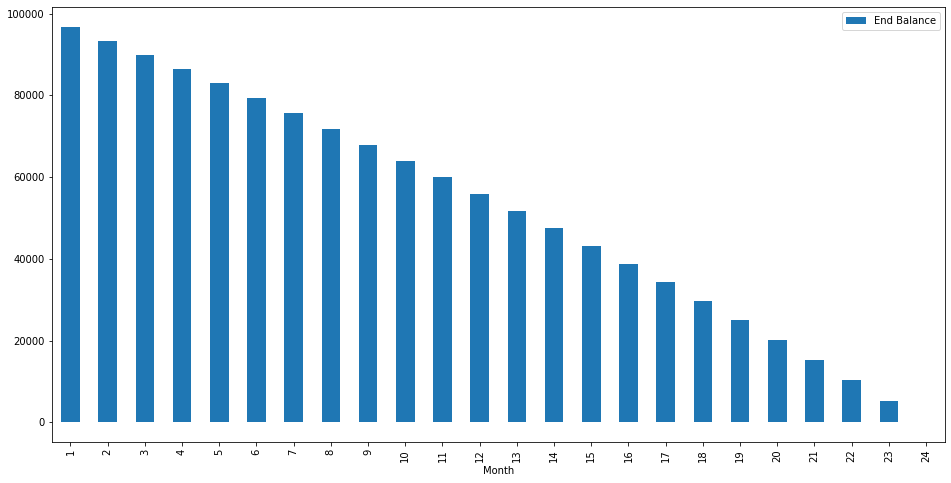

In [11]:
annuity[['End Balance']].plot(kind='bar',figsize=(16,8))